In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, seed

In [ ]:
def obj(x):
    return x**2.0

In [18]:
def derv(x):
    return 2.0 * x

In [12]:
def grad_des_momentum(obj, derv, bound, iter, lr, momentum):
    solution = bound[:, 0] + rand(len(bound)) * (bound[:, 1] - bound[:, 0])
    change = 0.0
    solutions, scores = [], []
    for i in range(iter):
        grad = derv(solution)
        newchange = lr * grad + momentum * change
        solution = solution - newchange
        change = newchange
        soln_eval = obj(solution)
        solutions.append(solution)
        scores.append(soln_eval)
    return solutions, scores

In [13]:
def rmsprop(obj, derv, bound, iter, lr, beta, eps=1e-8):
    solution = bound[:, 0] + rand(len(bound)) * (bound[:, 1] - bound[:, 0])
    sq_grad = 0.0
    solutions, scores = [], []
    for i in range(iter):
        grad = derv(solution)
        sq_grad = beta * sq_grad + (1 - beta) * grad**2
        solution = solution - (lr / (np.sqrt(sq_grad) + eps)) * grad
        soln_eval = obj(solution)
        solutions.append(solution)
        scores.append(soln_eval)
    return solutions, scores

In [14]:
def adam(obj, derv, bound, iter, lr, beta1, beta2, eps=1e-8):
    solution = bound[:, 0] + rand(len(bound)) * (bound[:, 1] - bound[:, 0])
    m, v = 0.0, 0.0
    solutions, scores = [], []
    for i in range(iter):
        grad = derv(solution)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1 ** (i + 1))
        v_hat = v / (1 - beta2 ** (i + 1))
        solution = solution - (lr / (np.sqrt(v_hat) + eps)) * m_hat
        soln_eval = obj(solution)
        solutions.append(solution)
        scores.append(soln_eval)
    return solutions, scores

In [15]:
seed(4)
bound = np.array([[-1.0, 1.0]])
iter = 30
lr = 0.1
momentum = 0.3
beta = 0.9
beta1, beta2 = 0.9, 0.999

In [16]:
sol_m, score_m = grad_des_momentum(obj, derv, bound, iter, lr, momentum)
sol_rms, score_rms = rmsprop(obj, derv, bound, iter, lr, beta)
sol_adam, score_adam = adam(obj, derv, bound, iter, lr, beta1, beta2)

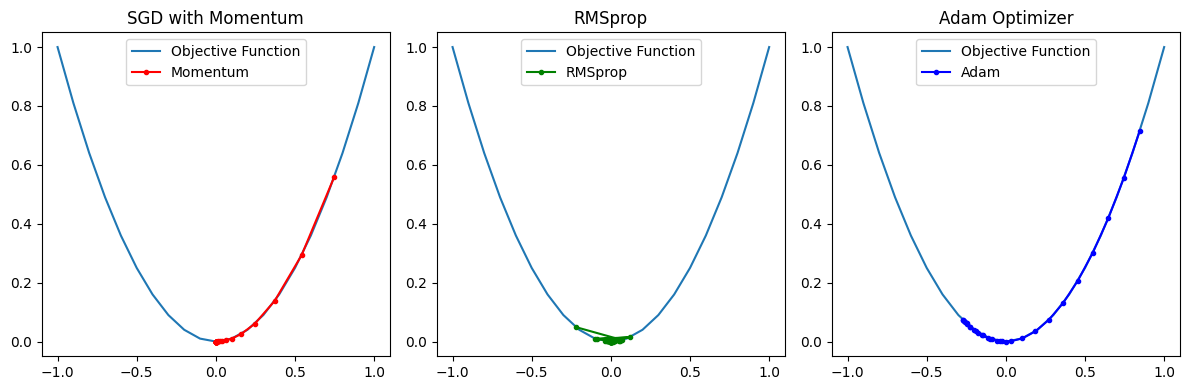

In [17]:
x_vals = np.arange(bound[0, 0], bound[0, 1] + 0.1, 0.1)
y_vals = obj(x_vals)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x_vals, y_vals, label="Objective Function")
plt.plot(sol_m, score_m, '.-', color='r', label="Momentum")
plt.title("SGD with Momentum")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x_vals, y_vals, label="Objective Function")
plt.plot(sol_rms, score_rms, '.-', color='g', label="RMSprop")
plt.title("RMSprop")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x_vals, y_vals, label="Objective Function")
plt.plot(sol_adam, score_adam, '.-', color='b', label="Adam")
plt.title("Adam Optimizer")
plt.legend()

plt.tight_layout()
plt.show()